## Carry out Students’ Early Attrition Modelling for any University that offers a 
## wide variety of degree programs, from online degrees to a doctorate in 
## education. Early attrition is defined as student drop out within one year of 
## successfully joining the program (completed admission process)  Leverage 
## data on student demographic profile, course preferences, performance 
## record, grades, financial background, financial aid and other application 
## information to identify key drivers of early student attrition. Build a predictive 
## model to identify students with higher early attrition risk. Recommend 
## appropriate interventions based on the analysis.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
# from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [4]:
def read_dataset():
    """
    This function will simply read the dataset into a pandas dataframe and return it
    # Data set accquired/Downloaded from kaggle:
    https://www.kaggle.com/datasets/ec3f351e04b3a5032bff35fa6196d52ce823835e12b3392f25d81fb6baf9bc9d
    """
    
    df = pd.read_csv("Dropout_Academic Success - Sheet1.csv")
    #print(df.head())
    return df
# df = read_dataset()
# df.dropna()

In [12]:
dict_target = {'Dropout':-1, 'Graduate': 0, 'Enrolled': 1}

In [13]:
df['Target'] = df['Target'].map(dict_target)
df['Target'].unique()

array([-1,  0,  1], dtype=int64)

In [14]:
df1 = df.loc[:, df.columns != 'Target']
df1.shape

(4424, 36)

In [16]:
df.shape

(4424, 37)

In [17]:
X = pd.DataFrame(df1, columns=df1.columns)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
# from sklearn.metrics import confusion_matrix
# from sklearn import metrics as ms
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Random Forest Model

In [20]:
rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=150)

In [21]:
rtree_predictions = rf.predict(X_test).round()
# print(rtree_predictions)
print("Accuracy of the RandomForestRegressor = ", accuracy_score(y_test, rtree_predictions).round(3))

print("The Confusion matrix for the above 3 targeted class is as follows:\nwith \nX-axis = Actual values and Y-axis = Predicted values")
print(pd.DataFrame(confusion_matrix(y_test, rtree_predictions), columns = list(df['Target'].unique())))
# print(cm)
# print("Accuracy:", ms.accuracy_score(y_test,rtree_predictions))



Accuracy of the RandomForestRegressor =  0.683
The Confusion matrix for the above 3 targeted class is as follows:
with 
X-axis = Actual values and Y-axis = Predicted values
    -1    0   1
0  220  153   1
1    4  529   2
2   21  170   6


[20 14  4  0  7 27 26 21  5 32 18 17 13 15  2 33 22  9  8  1 28 34 23 11
 24  3 10 35 29 19 25  6 16 12 31 30]


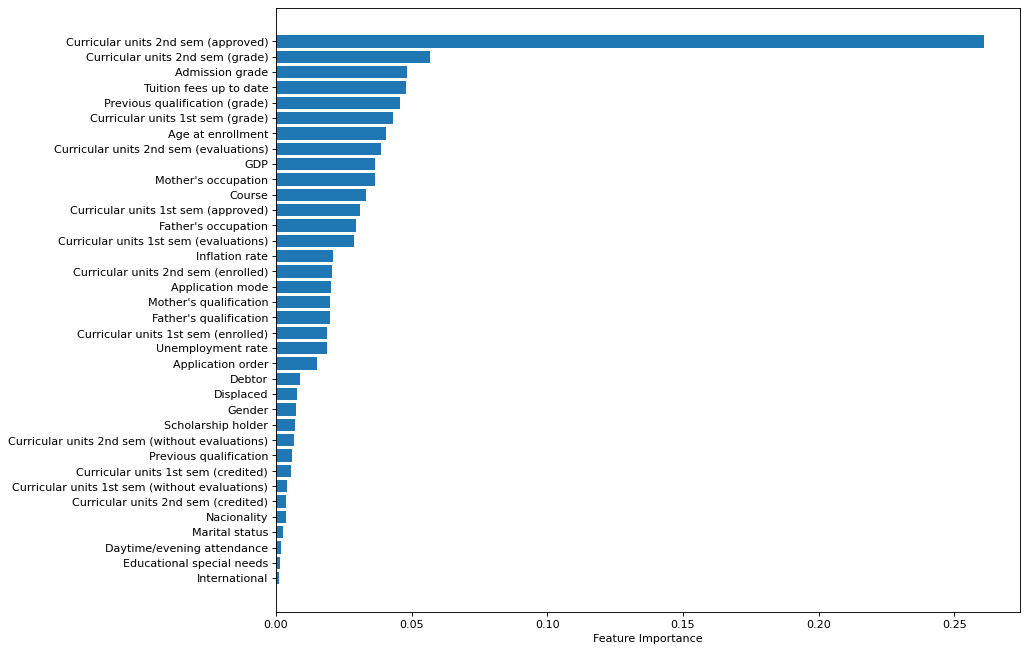

In [22]:
sort = rf.feature_importances_.argsort()
print(sort)
figure(figsize=(12, 10), dpi=80)
# fig, ax = plt.subplots()
# plt.subplots_adjust(bottom = 0.2)
plt.barh(df.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

# plt.figure(figsize=(100,200))
plt.show()

In [101]:
df['GDP'].unique()

array([ 1.74,  0.79, -3.12, -0.92, -4.06,  3.51, -1.7 ,  2.02,  0.32,
        1.79])

In [79]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

## Since now we have read the dataset, we now check the quality of that dataset, i.e. check out for any missing values, error data or any other cleaning of the dataset if required.

In [28]:
df.isna().sum().values # Gives us the sum of nan values in each of the attributes
# we see that it does not have any nan values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [29]:
# Now we check each column if there's any inconsistency

df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,-1
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,-1
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0


In [30]:
# df['Previous qualification (grade)'].max() # Since this max value is 190, we can assume that the total marks would be out of 200

# Nationality has incorrect spelling, so we correct/ rename that.
# df.rename(columns = {'Nacionality':'Nationality'}, inplace = True)
df['Curricular units 2nd sem (grade)'].max()


18.57142857

In [1]:
# import seaborn as sns
# ax = sns.pairplot(df)
  
# # giving title to the plot
# plt.title('Graph')
# plt.show()

# Recommend appropriate interventions based on the analysis.

In [31]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,-1
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,-1
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0


# Before we build a model let's try and undertand what might be different reasons for student's early attrition rate.

In [42]:
df.rename(columns = {'Nacionality':'Nationality'}, inplace = True)
dropout_df = df[df['Target'] == -1] # as Dropout is replaced by 1
print(df.shape)
print(dropout_df.shape)

(4424, 37)
(1421, 37)


In [43]:
print("The total number of records we are having are: {}".format(df.shape))
print("The total number of dropout records we are having are: {}".format(dropout_df.shape))
print("\n==================================================================")
total_number = df.shape[0]
dropout_number = dropout_df.shape[0]
print("The percentage of students that have dropped out are {}%".format(round((dropout_number/total_number)*100, 2)))

The total number of records we are having are: (4424, 37)
The total number of dropout records we are having are: (1421, 37)

The percentage of students that have dropped out are 32.12%


In [44]:
dropout_df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.0,0,10.8,1.4,1.74,-1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.0,0,10.8,1.4,1.74,-1
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.0,0,15.5,2.8,-4.06,-1
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.5,0,8.9,1.4,3.51,-1
12,1,1,2,9853,1,1,133.0,1,19,37,...,0,6,0,0,0.0,0,12.7,3.7,-1.70,-1


In [45]:
# Counter(list(df['Previous qualification']))

In [75]:
# # Now lets checkout the count of each attribute of which is max that is resulting in student attrition
# from collections import Counter
# Counter(dropout_df['Curricular units 2nd sem (grade)'])

# # Out of all the Marital Status values we have we see that value number:1 is droopping out the most
# # We need to make sure what type of status is this and make sure we reduce the number of admits and give opportunity to other
# # Marital status number

# # Output:
# # Counter({1: 1184, 2: 179, 4: 42, 3: 1, 5: 11, 6: 4})

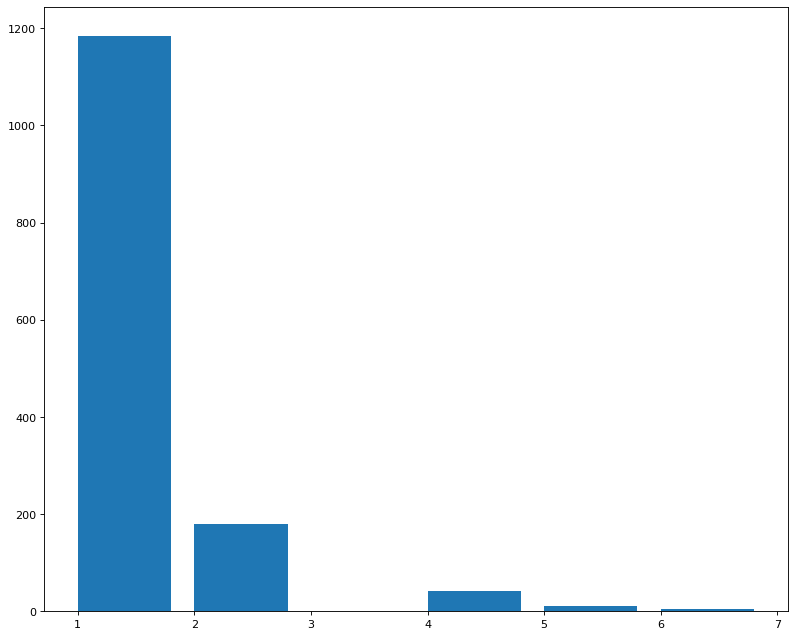

Dropout status for col = 'Marital status' based on the greatest first are as follows: format = (key: occurrence)


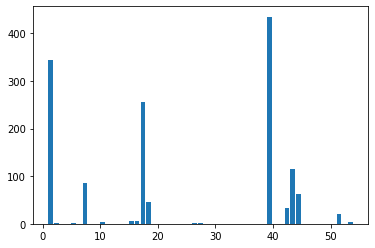

Dropout status for col = 'Application mode' based on the greatest first are as follows: format = (key: occurrence)


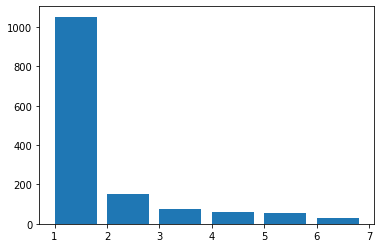

Dropout status for col = 'Application order' based on the greatest first are as follows: format = (key: occurrence)


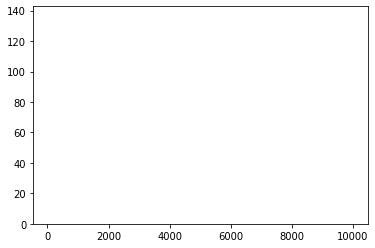

Dropout status for col = 'Course' based on the greatest first are as follows: format = (key: occurrence)


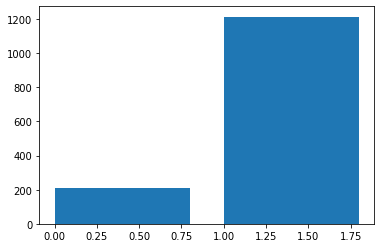

Dropout status for col = 'Daytime/evening attendance' based on the greatest first are as follows: format = (key: occurrence)


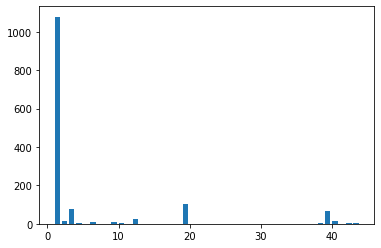

Dropout status for col = 'Previous qualification' based on the greatest first are as follows: format = (key: occurrence)


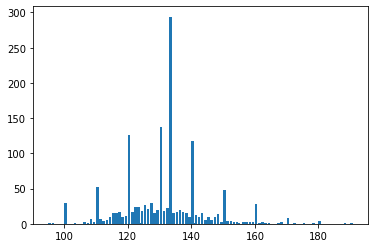

Dropout status for col = 'Previous qualification (grade)' based on the greatest first are as follows: format = (key: occurrence)


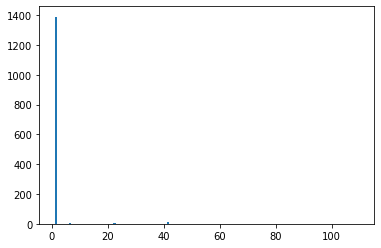

Dropout status for col = 'Nationality' based on the greatest first are as follows: format = (key: occurrence)


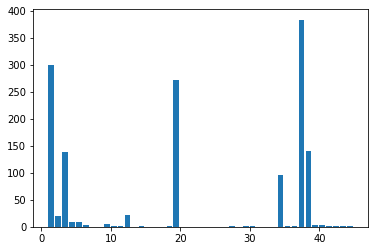

Dropout status for col = 'Mother's qualification' based on the greatest first are as follows: format = (key: occurrence)


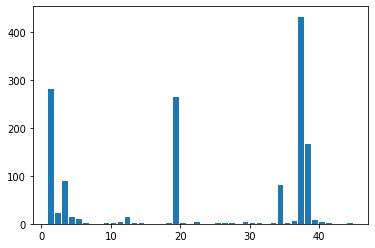

Dropout status for col = 'Father's qualification' based on the greatest first are as follows: format = (key: occurrence)


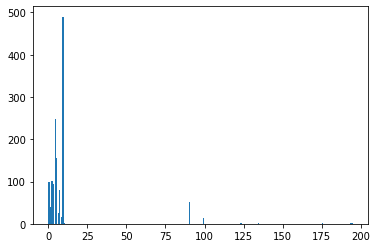

Dropout status for col = 'Mother's occupation' based on the greatest first are as follows: format = (key: occurrence)


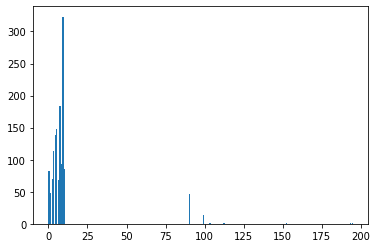

Dropout status for col = 'Father's occupation' based on the greatest first are as follows: format = (key: occurrence)


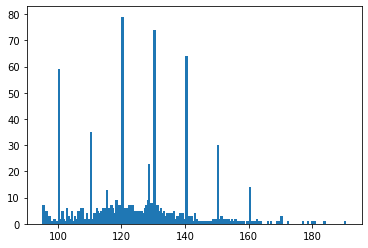

Dropout status for col = 'Admission grade' based on the greatest first are as follows: format = (key: occurrence)


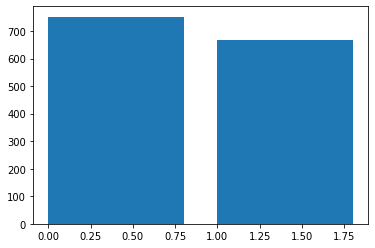

Dropout status for col = 'Displaced' based on the greatest first are as follows: format = (key: occurrence)


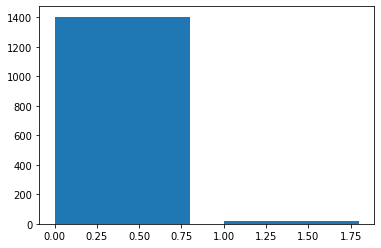

Dropout status for col = 'Educational special needs' based on the greatest first are as follows: format = (key: occurrence)


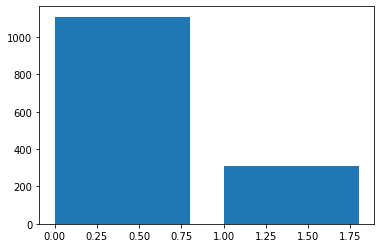

Dropout status for col = 'Debtor' based on the greatest first are as follows: format = (key: occurrence)


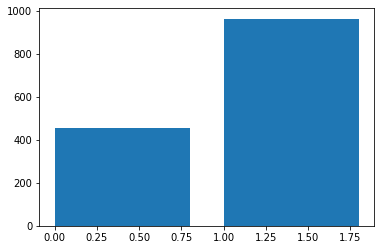

Dropout status for col = 'Tuition fees up to date' based on the greatest first are as follows: format = (key: occurrence)


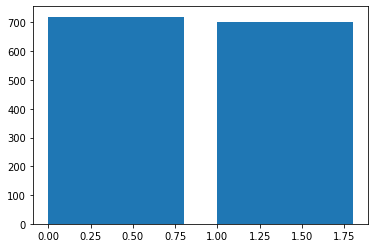

Dropout status for col = 'Gender' based on the greatest first are as follows: format = (key: occurrence)


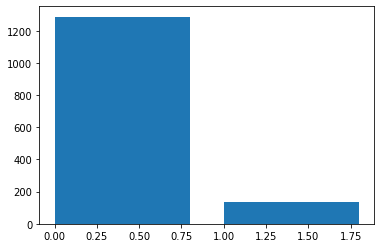

Dropout status for col = 'Scholarship holder' based on the greatest first are as follows: format = (key: occurrence)


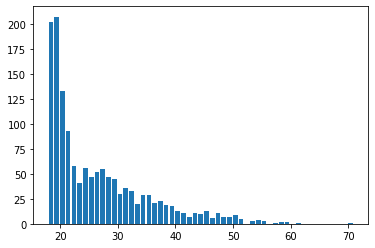

Dropout status for col = 'Age at enrollment' based on the greatest first are as follows: format = (key: occurrence)


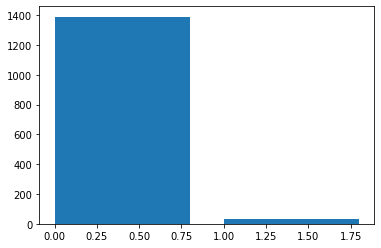

Dropout status for col = 'International' based on the greatest first are as follows: format = (key: occurrence)


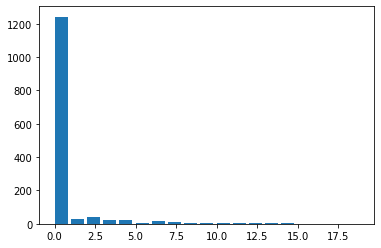

Dropout status for col = 'Curricular units 1st sem (credited)' based on the greatest first are as follows: format = (key: occurrence)


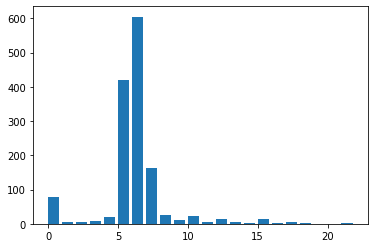

Dropout status for col = 'Curricular units 1st sem (enrolled)' based on the greatest first are as follows: format = (key: occurrence)


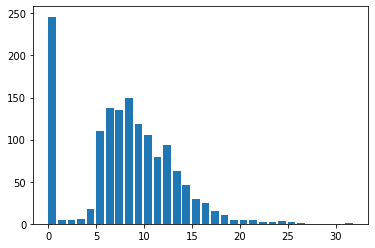

Dropout status for col = 'Curricular units 1st sem (evaluations)' based on the greatest first are as follows: format = (key: occurrence)


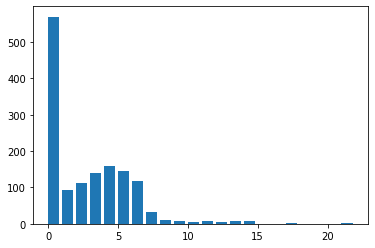

Dropout status for col = 'Curricular units 1st sem (approved)' based on the greatest first are as follows: format = (key: occurrence)


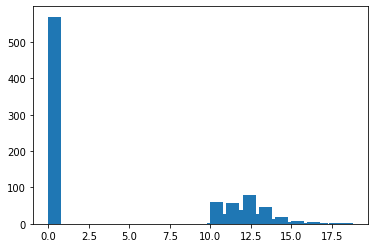

Dropout status for col = 'Curricular units 1st sem (grade)' based on the greatest first are as follows: format = (key: occurrence)


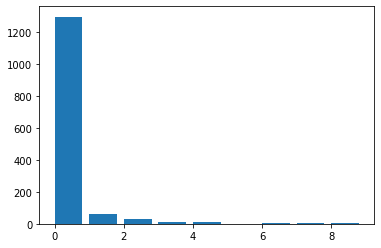

Dropout status for col = 'Curricular units 1st sem (without evaluations)' based on the greatest first are as follows: format = (key: occurrence)


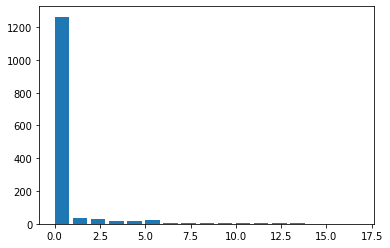

Dropout status for col = 'Curricular units 2nd sem (credited)' based on the greatest first are as follows: format = (key: occurrence)


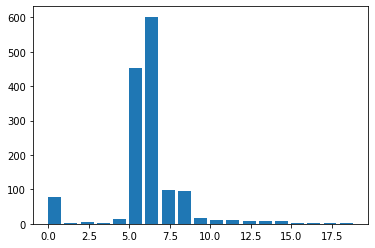

Dropout status for col = 'Curricular units 2nd sem (enrolled)' based on the greatest first are as follows: format = (key: occurrence)


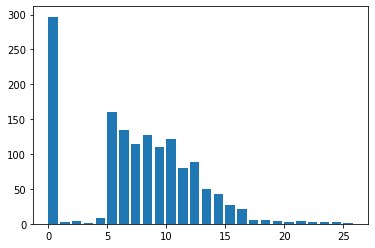

Dropout status for col = 'Curricular units 2nd sem (evaluations)' based on the greatest first are as follows: format = (key: occurrence)


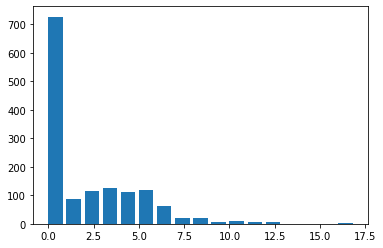

Dropout status for col = 'Curricular units 2nd sem (approved)' based on the greatest first are as follows: format = (key: occurrence)


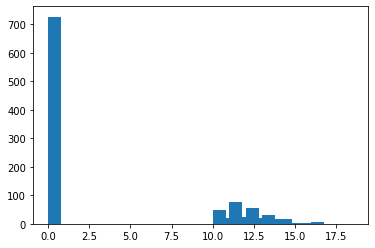

Dropout status for col = 'Curricular units 2nd sem (grade)' based on the greatest first are as follows: format = (key: occurrence)


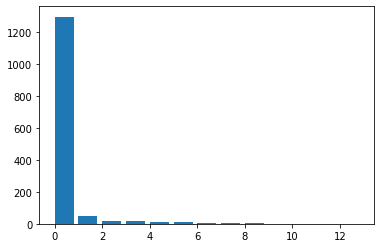

Dropout status for col = 'Curricular units 2nd sem (without evaluations)' based on the greatest first are as follows: format = (key: occurrence)


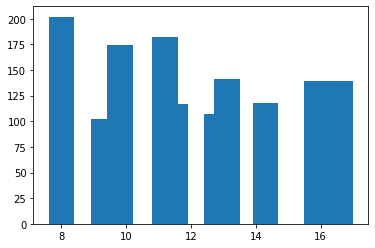

Dropout status for col = 'Unemployment rate' based on the greatest first are as follows: format = (key: occurrence)


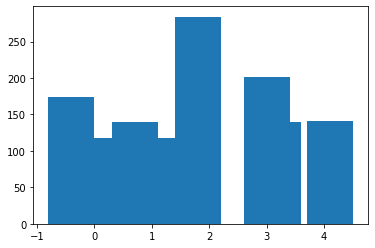

Dropout status for col = 'Inflation rate' based on the greatest first are as follows: format = (key: occurrence)


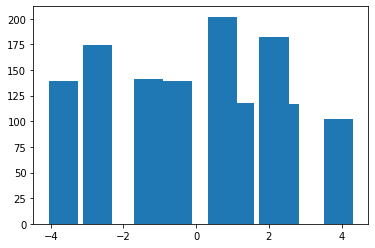

Dropout status for col = 'GDP' based on the greatest first are as follows: format = (key: occurrence)


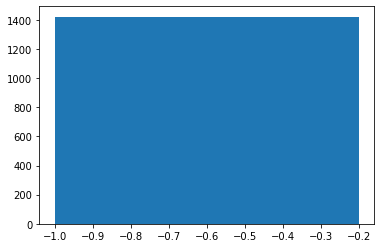

Dropout status for col = 'Target' based on the greatest first are as follows: format = (key: occurrence)


In [51]:
# why don't we write some logic that will scan quickly through each column and give us similar stats as above
# [(1, 1184), (2, 179), (4, 42), (5, 11), (6, 4), (3, 1)]
list_of_columns = list(dropout_df.columns)
figure(figsize=(12, 10), dpi=80)
for col in list_of_columns:
    key_list = []
    value_list = []
    
    
    dropout_col_dict = Counter(dropout_df[col]).most_common()
    for ele in dropout_col_dict:
#         print(ele)
        key_list.append(ele[0])
        value_list.append(ele[1])

#     x_pos = np.arange(len(key_of_dropout_dict))
#     default_x_ticks = range(len(key_list))
#     plt.xticks(default_x_ticks, key_list)
    plt.bar(key_list, value_list, align='edge')
    
    plt.show()
    print("Dropout status for col = '{col}' based on the greatest first are as follows: format = (key: occurrence)".format(col= col))
    

In [69]:
# dropout_col_dict_test = Counter(dropout_df['Curricular units 2nd sem (grade)']).most_common()
# dropout_col_dict_test2 = Counter(dropout_df['Curricular units 2nd sem (approved)']).most_common()
# # print(dropout_df['Course'].unique())
# # key_list = []
# # value_list = []
# # print(dropout_col_dict)
# # for ele in dropout_col_dict:
# #     key_list.append(ele[0])
# #     value_list.append(ele[1])

# # print((key_list))
# # print((value_list))
# # default_x_ticks = range(len(key_list))
# # plt.bar(key_list, value_list, align='center')
# # # plt.pie(key_list, value_list)
# # plt.xticks(default_x_ticks, key_list)
# # plt.show()
# # print(dropout_col_dict_test)
# # print(dropout_df['Curricular units 2nd sem (grade)'].unique())

# print(dropout_col_dict_test2)
# # print(dropout_df['Curricular units 2nd sem (approved)'].unique())
# # print(dropout_df['Curricular units 2nd sem (approved)'].tolist())

## Logistic Regression model

In [263]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
df3 = read_dataset()

In [264]:
# print(len(sort))
# Selecting 1st 25 features
df3 = df3.iloc[:, sort[:25]]
print(len(df3.columns))

25


In [265]:
print(df3.columns)

Index(['International', 'Educational special needs',
       'Daytime/evening attendance', 'Marital status', 'Nacionality',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (without evaluations)',
       'Curricular units 1st sem (credited)', 'Previous qualification',
       'Scholarship holder', 'Displaced', 'Gender', 'Debtor',
       'Application order', 'Unemployment rate',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 2nd sem (enrolled)', 'Mother's qualification',
       'Inflation rate', 'Application mode', 'Father's qualification',
       'Father's occupation', 'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)'],
      dtype='object')


In [269]:
X = pd.DataFrame(df3, columns=df3.columns)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [270]:
logreg = LogisticRegression()
# rfe = RFE(logreg, 20)
rfe = logreg.fit(X_train, y_train)

c:\users\vedant\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [271]:
# print(rfe.support_)
# print(rfe.ranking_)
# print(rfe.summary2())
# # print(rfe.ranking_)
y_pred = rfe.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.74


In [191]:
# Things to try:
# Study each feature. Know what they mean
# Feature engineering -reduce the columns and select the one's that have high relevance
# Build/ understand a proper confusion matrix
# Find out accuracy, recall, f1 score, etc

In [274]:
print(pd.DataFrame(confusion_matrix(y_test, y_pred), columns = list(df['Target'].unique())))
# print(accuracy_score(y_test, y_pred).round(3))

    -1    0   1
0  226   47  11
1   33  406  11
2   61   66  24
0.741


In [9]:
df4 = read_dataset()


# We have a base model ready, now let's try to build on this and improve the accuracy

In [45]:
df5 = read_dataset()

# Since we are only looking for Droupout students, we can group other labels into 1 Label

In [11]:
# # dict_target = {'Dropout':-1, 'Graduate': 0, 'Enrolled': 1}
# dict_target = {'Dropout':-1, 'Graduate': 0, 'Enrolled': 1}

In [46]:
# df5['Target'] = df5['Target'].map(dict_target)
df5['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [47]:
dict_new_target = {'Dropout':'Dropout', 'Graduate':'Graduate', 'Enrolled':'Graduate'}
df5['Target'] = df5['Target'].map(dict_new_target)
print(df5['Target'].unique())
print("As we can see from above list, we have converted the multiclass classification problem into a Binary classification problem")

['Dropout' 'Graduate']
As we can see from above list, we have converted the multiclass classification problem into a Binary classification problem


In [48]:
dropout_df5 = df5[df5['Target'] == 'Dropout']

In [50]:
print("The total number of records we are having are: {}".format(df5.shape))
print("The total number of dropout records we are having are: {}".format(dropout_df5.shape))
print("\n==================================================================")
total_number = df5.shape[0]
dropout_number = dropout_df5.shape[0]
print("The percentage of students that have dropped out are {}%".format(round((dropout_number/total_number)*100, 2)))

The total number of records we are having are: (4424, 37)
The total number of dropout records we are having are: (1421, 37)

The percentage of students that have dropped out are 32.12%


In [25]:
# df4.head()

In [51]:
dict_target = {'Dropout':1, 'Graduate':0}
df5['Target'] = df5['Target'].map(dict_target)


In [52]:
df5['Target'].unique()

array([1, 0], dtype=int64)

In [53]:
X = pd.DataFrame(df5, columns=df5.columns)
y = df5['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [87]:
# We take the first 25 most relevant features
rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train, y_train)
sort = rf.feature_importances_.argsort()

df5 = df5.iloc[:, sort[:25]]
print(len(df5.columns))

25


In [68]:
# X = pd.DataFrame(df4, columns=df4.columns)
# y = df5['Target']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

In [54]:
logreg = LogisticRegression()
# rfe = RFE(logreg, 20)
rfe = logreg.fit(X_train, y_train)

c:\users\vedant\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [55]:
# print(rfe.support_)
# print(rfe.ranking_)
# print(rfe.summary2())
# # print(rfe.ranking_)
y_pred = rfe.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


In [128]:
# print(pd.DataFrame(confusion_matrix(y_test, y_pred), columns = list(df5['Target'].unique())))


In [56]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(precision_score(y_test, y_pred))
# print(f1_score(y_test, y_pred))

0.8451882845188284


In [57]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

In [58]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

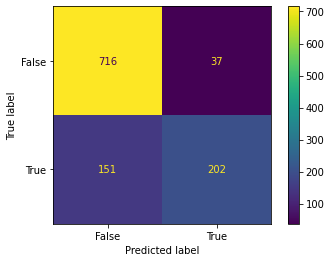

In [59]:
cm_display.plot()
plt.show()

In [60]:
Precision = metrics.precision_score(y_test, y_pred)
print(Precision)

0.8451882845188284


In [61]:
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
print(Sensitivity_recall)

0.5722379603399433


In [62]:
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
print(Specificity)

0.950863213811421


In [63]:
F1_score = metrics.f1_score(y_test, y_pred)
print(F1_score)

0.6824324324324323


Text(0, 0.5, 'True Positive Rate')

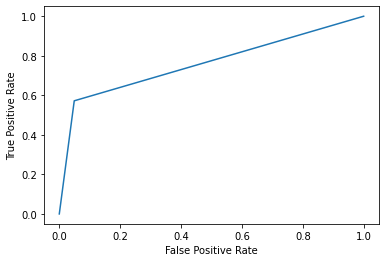

In [64]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [65]:
from sklearn.metrics import roc_auc_score

micro_roc_auc_ovr = roc_auc_score(
    y_test, y_pred,
    multi_class="ovr",
    average="micro",
)

print(micro_roc_auc_ovr)

0.7615505870756822


## Trying to transform the data and see if the model accuracy & recall can be increased.

In [5]:
df6 = read_dataset()

In [6]:
dict_new_target6 = {'Dropout':'Dropout', 'Graduate':'Graduate', 'Enrolled':'Graduate'}
df6['Target'] = df6['Target'].map(dict_new_target6)
print(df6['Target'].unique())
print("As we can see from above list, we have converted the multiclass classification problem into a Binary classification problem")

['Dropout' 'Graduate']
As we can see from above list, we have converted the multiclass classification problem into a Binary classification problem


In [7]:
dropout_df6 = df6[df6['Target'] == 'Dropout']

In [8]:
dict_target6 = {'Dropout':1, 'Graduate':0}
df6['Target'] = df6['Target'].map(dict_target6)


In [9]:
print("The total number of records we are having are: {}".format(df6.shape))
print("The total number of dropout records we are having are: {}".format(dropout_df6.shape))
print("\n==================================================================")
total_number = df6.shape[0]
dropout_number = dropout_df6.shape[0]
print("The percentage of students that have dropped out are {}%".format(round((dropout_number/total_number)*100, 2)))

The total number of records we are having are: (4424, 37)
The total number of dropout records we are having are: (1421, 37)

The percentage of students that have dropped out are 32.12%


In [10]:
# X = pd.DataFrame(df6.iloc[:, :-2], columns=df6.columns[-2])
# y = df6['Target']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [11]:
X = df6.iloc[:, :-2]
# X.columns
y = df6['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
X_train_scaled = scaler.fit_transform(X_train)

In [14]:
X_test_scaled = scaler.transform(X_test)

In [15]:
classification = LogisticRegression()

In [16]:
classification.fit(X_train_scaled, y_train)
# df6.isna().sum()

LogisticRegression()

In [17]:
y_pred = classification.predict(X_test_scaled)

In [18]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[414  34]
 [ 49 167]]


In [19]:
Precision = metrics.precision_score(y_test, y_pred)
print(Precision)

0.8308457711442786


In [20]:
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
print(Sensitivity_recall)

0.7731481481481481


In [21]:
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
print(Specificity)

0.9241071428571429


In [22]:
F1_score = metrics.f1_score(y_test, y_pred)
print(F1_score)

0.8009592326139089


In [32]:
report = metrics.classification_report(y_test, y_pred, output_dict=True)
# print(report)
report_df = pd.DataFrame(report).transpose()
print(report_df)

              precision    recall  f1-score  support
0              0.894168  0.924107  0.908891  448.000
1              0.830846  0.773148  0.800959  216.000
accuracy       0.875000  0.875000  0.875000    0.875
macro avg      0.862507  0.848628  0.854925  664.000
weighted avg   0.873570  0.875000  0.873781  664.000


In [36]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Graduate", "Dropout"])

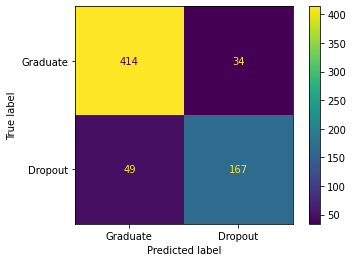

In [37]:
cm_display.plot()
plt.show()

Text(0, 0.5, 'True Positive Rate')

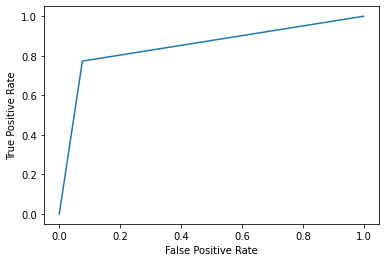

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [2]:
# from numpy import mean
# from numpy import std
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedKFold

# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# scores = cross_val_score(classification, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [1]:
# print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))